Below is an example from a librat tutorial that highlights the use of formatted text and live code cells. As librat is 
written in C, Python makes calls to the command line to run the programme and then interprets the results.

## Using the UCL librat Radiative Transfer code via Jupyter
Here we will experiment with different sun and viewing angles using a couple of birch trees

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from run_start import *
from hips import hips2img
from generate_camera_file import update_existing_camera
%matplotlib inline

## Changing view angle in <code><span style="background-color:lightgrey">camera/simple.camera</span></code>
Options that were changed to create the following example are:

<code>geometry.zenith</code> in the below example this has been modified to 70$^{\circ}$.

<code>geometry.lookAt</code> changes the centre of the image, here this has been changed to <code>[0, 3, 1.5]</code> (x, y, z)

<code>results.image</code> and <code>result.integral</code> were also updated to prevent previous experiments being over written

start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 -6.396926 4.920201 focalLength: 0.400000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


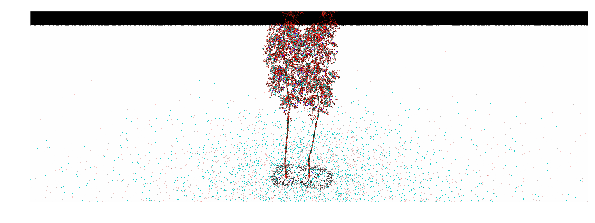

In [2]:
cmd = "echo 14 camera/camera_birches.dat light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/a_pair_of_birch_trees.obj"
error = run_start(cmd)

if not error:
    # here we create a false colour NIR image by reordering the bands, stretch is
    # therefore also turned off.
    hips2img('output/2birches.hips', stretch=False, order=[3, 1, 2])

## Changing illumination parameters in <code><span style="background-color:lightgrey">light/simple.light</span></code>

For an illumination source, azimuth and zenith geometry can be changed using the <code>geometry.zenith</code> and <code>geometry.aziumth</code> variables respectively. Below we generate two plots from azimuth angles of 0 and 180.

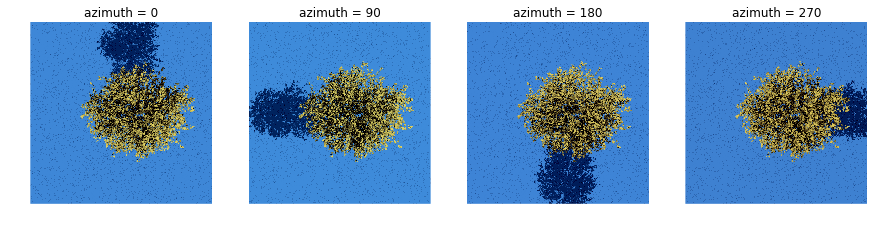

In [4]:
plt.figure(figsize=(15, 3.75))

camera_fname = 'camera/simple.camera'
light_fname = 'light/simple.light'

cmd = "echo 14 {} {} | \
       start -RATm 5 -RATsensor_wavebands \
       wb/waveband.dat obj/birch_tree_scene.obj"

for i, azimuth in enumerate([0, 90, 180, 270]):
    
    oname = 'output/azimuth.temp'
    im = update_existing_camera(camera_fname, 
                                camera_fname + '.temp',
                                oname=oname,
                                new_options={'geometry.idealArea':4})
    
    update_existing_camera(light_fname,
                           light_fname + '.temp',
                           new_options={'geometry.azimuth':azimuth,
                                        'geometry.zenith':20})
    
    error = run_start(cmd.format(camera_fname + '.temp', light_fname + '.temp'))
    
    if not error:
        ax = hips2img(oname + '.hips', stretch=True, ax=plt.subplot(1, 4, i+1), imshow=False)
        ax.set_title('azimuth = {}'.format(azimuth))